# Classical classifiers

This notebook shows how well classical classifiers solve the sentence classification problem. This is mainly needed to have a baseline for quantum solution to compare against.

We first load our library files and the required packages.

In [1]:
import sys
import os
import json
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

sys.path.append("../../models/classical/")

from NNClassifier import (loadData,evaluate, NNClassifier,
       prepareTrainTestDevXYWords, prepareTrainTestDevXYSentence,)

We have implemented sentence vectorization using pretrained BERT cased and uncased (see [Git](https://github.com/google-research/bert), [arXiv](https://arxiv.org/abs/1810.04805)) base models (each sentence is represented as a 768-dimensional real-valued vector), sentence transformer models *all-mpnet-base-v2* and *all-distilroberta-v1* (see [link](https://www.sbert.net/docs/pretrained_models.html)) as well as word-level vectorization using [_fastText_](https://fasttext.cc/) model pretrained on [English Wikipedia and Common Crawl](hhttps://fasttext.cc/docs/en/crawl-vectors.html) (each word in a sentence is represented as a 300-dimensional real-valued vector).

The Jupyter notebook *Prepare_datasets_4classifier.ipynb* shows how to filterdata and acquire embedding vectors using different vectorization models.

In [2]:
datadir = "../../data/datasets"
dsName='reviews'

In [3]:
modeldir="../../models/classical"

## 1. Training shallow feedforward neural network

To train shallow feedforward neural network models we employ sentence level embeddings. 

In [4]:
embName='BERT_CASED'

In [5]:
data = loadData(f"{datadir}/{dsName}_{embName}.json")
print(f"Training samples: {len(data['train_data'])}, test samples: {len(data['test_data'])}, dev samples: {len(data['dev_data'])}")
print(f"An example sentence: {data['train_data'][2]['sentence']}, class: {data['train_data'][2]['class']}, syntactical tag: {data['train_data'][2]['tag']}")
print(f"Vectorized sentence dimension: {len(data['train_data'][0]['sentence_vectorized'][0])}")

Training samples: 1571, test samples: 196, dev samples: 197
An example sentence: the chocolate was old, class: 1, syntactical tag: s[n[(n/n)   n] (s\\n)[((s\\n)/(s\\n))   (s\\n)]]
Vectorized sentence dimension: 768


We reformat the data as numpy arrays for classifier training. 

In [6]:
trainX, trainY, testX, testY, devX, devY = prepareTrainTestDevXYSentence(data,classify_by_field="class")
print(f"{trainX.shape}")
print(f"{trainY.shape}")
print(f"{testX.shape}")
print(f"{testY.shape}")
print(f"{devX.shape}")
print(f"{devY.shape}")

(1571, 768)
(1571, 5)
(196, 768)
(196, 5)
(197, 768)
(197, 5)


Now we train a feedforward neural network classifier.

In [7]:
print(devX)

[[ 0.28046277 -0.18528108  0.05173931 ...  0.17584634  0.07941458
   0.01433272]
 [ 0.70588696 -0.0015737   0.20919606 ... -0.1368085   0.24537118
   0.03277288]
 [ 0.26018399  0.05963252 -0.0916761  ... -0.29934782  0.42055321
  -0.17333287]
 ...
 [ 0.39996916  0.06902911  0.12593533 ... -0.18099815  0.3383137
  -0.34528592]
 [ 0.62055993  0.08183953  0.01004098 ... -0.11729215  0.58962715
   0.05151162]
 [ 0.34008566  0.07338984  0.11022518 ... -0.03666795  0.37487787
   0.00662323]]


In [8]:
print(testX)

[[ 0.53748977 -0.17705502  0.19464959 ...  0.12249699  0.08577345
  -0.11184955]
 [ 0.36047009  0.25036272 -0.02308201 ...  0.23346809  0.2495546
  -0.12854083]
 [ 0.48181191 -0.03728313  0.00566796 ... -0.23119842  0.39416498
  -0.04136955]
 ...
 [ 0.746382    0.18807895  0.28883731 ... -0.23611097  0.38882929
  -0.0552661 ]
 [-0.06662244 -0.11112172  0.30400929 ...  0.15677774  0.44500446
   0.0501774 ]
 [ 0.46250865 -0.07756969 -0.19093622 ...  0.01876603  0.35094249
   0.0198545 ]]


In [9]:
print(devY)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1.

In [10]:
print(testY)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1.

In [11]:
classifier = NNClassifier()
history = classifier.train(trainX, trainY, devX, devY)

Training/running model on CPU.
Training with early stopping.
Epoch 1/100
50/50 - 0s - loss: 1.1841 - accuracy: 0.5964 - val_loss: 1.1314 - val_accuracy: 0.6091 - 457ms/epoch - 9ms/step
Epoch 2/100
50/50 - 0s - loss: 1.0766 - accuracy: 0.6187 - val_loss: 1.0707 - val_accuracy: 0.6345 - 53ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 1.0249 - accuracy: 0.6410 - val_loss: 1.0591 - val_accuracy: 0.6142 - 53ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.9863 - accuracy: 0.6435 - val_loss: 1.0274 - val_accuracy: 0.6294 - 51ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.9575 - accuracy: 0.6639 - val_loss: 1.0174 - val_accuracy: 0.6345 - 53ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.9443 - accuracy: 0.6620 - val_loss: 1.0072 - val_accuracy: 0.6447 - 53ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.9195 - accuracy: 0.6696 - val_loss: 1.0119 - val_accuracy: 0.6447 - 53ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.9068 - accuracy: 0.6760 - val_loss: 0.9911 -

## 2. Evaluating shallow feedforward neural network

The *history* object returned by *train* function holds a record of the metric values during training.

In [12]:
nn_train_acc = history.history["accuracy"][-1]
print(f"FNN train accuracy on {embName} vectors: {nn_train_acc}")

FNN train accuracy on BERT_CASED vectors: 0.7670273780822754


And measure the accuracy on the test set.

In [13]:
res = classifier.predict(testX)
nn_test_acc = evaluate(res, testY)
print(f"FFNN test accuracy on {embName} vectors: {nn_test_acc}")

FFNN test accuracy on BERT_CASED vectors: 0.6530612244897959


For comparison we employ the nierest neighbor algorithm on the same data. We calculate the accuracy of classifying the sentence with the label corresponding to the closest sentence in the training data.

In [14]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(trainX, trainY)
res = neigh.predict(testX)
neigh_test_acc = np.sum(res == testY)/len(testY[0])/len(testY)
neigh_train_acc = neigh.score(trainX, trainY)
print(f"Nearest neighbor test accuracy: {neigh_test_acc}, train accuracy: {neigh_train_acc}")

Nearest neighbor test accuracy: 0.8428571428571427, train accuracy: 1.0


Depending on random, the FNN classifier might perform better or worse (or the same) than the 1-nearest neighbor algorithm.

## 3. Training convolutional neural network classifier

Now we load fastText word embeddings and train a convolutional network on them.

In [15]:
data = loadData(f"{datadir}/{dsName}_FASTTEXT.json")

maxLen = 6
trainX, trainY, testX, testY, devX, devY = prepareTrainTestDevXYWords(data, maxLen,classify_by_field="class")

cnnclassifier = NNClassifier(model="CNN", vectorSpaceSize=300)
history = cnnclassifier.train(trainX, trainY, devX, devY)

THIS WAS A 5 STAR
the price is outrageous
the chocolate was old
I relish this relish
I LOVE THIS OATMEAL
pero is great
Cadet Bully Sticks
This is the best coffee
CRUNCHIES IS DISAPPOINTING
Taste is bad
FRS is great
I am a Chai Lover
I love this storage drawer
Koma is delicious
Melba Toast Rocks
Popster 's Awsome
I got my Iced Tea
The price was right
AeroGarden is wonderful
Necco Waffers Delight
bugs are yummy
I love this peanut butter
the jam is good
i like this flavor
It Was a Gift
This Tiger really growls
The Sparkle was gone
I Love this mustard
Keurig coffee refils
New formula fails
My Baby 's Addicted
Favorite Chai Concentrate
Looks are deceiving
This stuff is GREAT
Dental Dog Chews
price is excellent
Ocumare is amazing
chips are awesome
some jars went bad
I gots the Bawls
Riceworks chips crushed
Dental hygiene chews
everyone loves this tea
Bigger is Better
HOSTESS IS AWFUL
It is the real thing
We love these bars
These nuts are great
Some Tings Never Change
dog teeth care
Kitty Cat

Epoch 1/30
50/50 - 1s - loss: 1.2045 - accuracy: 0.5875 - val_loss: 1.1032 - val_accuracy: 0.6142 - 566ms/epoch - 11ms/step
Epoch 2/30
50/50 - 0s - loss: 1.0192 - accuracy: 0.6404 - val_loss: 1.0531 - val_accuracy: 0.6396 - 131ms/epoch - 3ms/step
Epoch 3/30
50/50 - 0s - loss: 0.9041 - accuracy: 0.6805 - val_loss: 1.0216 - val_accuracy: 0.6345 - 139ms/epoch - 3ms/step
Epoch 4/30
50/50 - 0s - loss: 0.8283 - accuracy: 0.7104 - val_loss: 1.0250 - val_accuracy: 0.6497 - 145ms/epoch - 3ms/step
Epoch 5/30
50/50 - 0s - loss: 0.7756 - accuracy: 0.7231 - val_loss: 1.0055 - val_accuracy: 0.6497 - 143ms/epoch - 3ms/step
Epoch 6/30
50/50 - 0s - loss: 0.7212 - accuracy: 0.7339 - val_loss: 0.9950 - val_accuracy: 0.6447 - 144ms/epoch - 3ms/step
Epoch 7/30
50/50 - 0s - loss: 0.6883 - accuracy: 0.7613 - val_loss: 0.9748 - val_accuracy: 0.6701 - 139ms/epoch - 3ms/step
Epoch 8/30
50/50 - 0s - loss: 0.6318 - accuracy: 0.7823 - val_loss: 0.9942 - val_accuracy: 0.6497 - 135ms/epoch - 3ms/step
Epoch 9/30
50/5

## 4. Evaluating convolutional neural network classifier

In [16]:
fasttext_nn_train_acc = history.history['accuracy'][-1]
print(f"CNN train accuracy on fastText vectors: {fasttext_nn_train_acc}")

CNN train accuracy on fastText vectors: 0.9382559061050415


In [17]:
res = cnnclassifier.predict(testX)
fasttext_nn_test_acc = evaluate(res, testY)
print(f"CNN test accuracy on fastText vectors: {fasttext_nn_test_acc}")

CNN test accuracy on fastText vectors: 0.6479591836734694


## 5. Comparing results

Now we will show results (train and test accuracies) in a chart.

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
test_accs = [fasttext_nn_test_acc, neigh_test_acc, nn_test_acc]
train_accs = [fasttext_nn_train_acc, neigh_train_acc, nn_train_acc]
labels = ["fastText CNN",f"{embName} nearest neighbors", f"{embName} NN"]

To compare results we will train models for other sentence embeddings as well.

In [19]:
for currEmb in ['BERT_UNCASED', 'all-distilroberta', 'all-mpnet-base']:
    data = loadData(f"{datadir}/{dsName}_{currEmb}.json")
    trainX, trainY, testX, testY, devX, devY = prepareTrainTestDevXYSentence(data,classify_by_field="class")

    currclassifier = NNClassifier()
    history = currclassifier.train(trainX, trainY, devX, devY)

    labels.append(f"{currEmb} NN")
    curr_train_acc = history.history["accuracy"][-1]
    train_accs.append(curr_train_acc)
    
    res = currclassifier.predict(testX)
    curr_test_acc = evaluate(res, testY)
    test_accs.append(curr_test_acc)

Training/running model on CPU.
Training with early stopping.
Epoch 1/100
50/50 - 0s - loss: 1.3515 - accuracy: 0.5251 - val_loss: 1.1613 - val_accuracy: 0.6091 - 325ms/epoch - 6ms/step
Epoch 2/100
50/50 - 0s - loss: 1.0783 - accuracy: 0.6155 - val_loss: 1.0747 - val_accuracy: 0.6244 - 48ms/epoch - 963us/step
Epoch 3/100
50/50 - 0s - loss: 1.0094 - accuracy: 0.6442 - val_loss: 1.0323 - val_accuracy: 0.6193 - 48ms/epoch - 959us/step
Epoch 4/100
50/50 - 0s - loss: 0.9656 - accuracy: 0.6601 - val_loss: 1.0049 - val_accuracy: 0.6599 - 47ms/epoch - 946us/step
Epoch 5/100
50/50 - 0s - loss: 0.9397 - accuracy: 0.6722 - val_loss: 0.9953 - val_accuracy: 0.6599 - 48ms/epoch - 960us/step
Epoch 6/100
50/50 - 0s - loss: 0.9126 - accuracy: 0.6849 - val_loss: 0.9807 - val_accuracy: 0.6599 - 48ms/epoch - 960us/step
Epoch 7/100
50/50 - 0s - loss: 0.8941 - accuracy: 0.6906 - val_loss: 0.9825 - val_accuracy: 0.6548 - 48ms/epoch - 961us/step
Epoch 8/100
50/50 - 0s - loss: 0.8819 - accuracy: 0.6919 - val_lo

Epoch 66/100
50/50 - 0s - loss: 0.6059 - accuracy: 0.7906 - val_loss: 1.0125 - val_accuracy: 0.6142 - 47ms/epoch - 940us/step
Epoch 67/100
50/50 - 0s - loss: 0.6011 - accuracy: 0.7931 - val_loss: 1.0170 - val_accuracy: 0.6345 - 47ms/epoch - 940us/step
Epoch 68/100
50/50 - 0s - loss: 0.5982 - accuracy: 0.7957 - val_loss: 1.0144 - val_accuracy: 0.6244 - 47ms/epoch - 940us/step
Epoch 69/100
50/50 - 0s - loss: 0.5941 - accuracy: 0.7989 - val_loss: 1.0067 - val_accuracy: 0.6345 - 47ms/epoch - 940us/step
Epoch 70/100
50/50 - 0s - loss: 0.5947 - accuracy: 0.7969 - val_loss: 1.0121 - val_accuracy: 0.6396 - 48ms/epoch - 950us/step
Epoch 71/100
50/50 - 0s - loss: 0.5964 - accuracy: 0.7989 - val_loss: 1.0140 - val_accuracy: 0.6294 - 47ms/epoch - 940us/step
Epoch 72/100
50/50 - 0s - loss: 0.5888 - accuracy: 0.7995 - val_loss: 1.0221 - val_accuracy: 0.6345 - 49ms/epoch - 980us/step
Epoch 73/100
50/50 - 0s - loss: 0.5929 - accuracy: 0.7957 - val_loss: 1.0153 - val_accuracy: 0.6345 - 48ms/epoch - 960

Epoch 31/100
50/50 - 0s - loss: 0.7708 - accuracy: 0.7269 - val_loss: 0.9407 - val_accuracy: 0.6853 - 46ms/epoch - 920us/step
Epoch 32/100
50/50 - 0s - loss: 0.7665 - accuracy: 0.7295 - val_loss: 0.9390 - val_accuracy: 0.6853 - 47ms/epoch - 950us/step
Epoch 33/100
50/50 - 0s - loss: 0.7625 - accuracy: 0.7314 - val_loss: 0.9380 - val_accuracy: 0.6853 - 47ms/epoch - 941us/step
Epoch 34/100
50/50 - 0s - loss: 0.7584 - accuracy: 0.7320 - val_loss: 0.9373 - val_accuracy: 0.6853 - 46ms/epoch - 920us/step
Epoch 35/100
50/50 - 0s - loss: 0.7546 - accuracy: 0.7327 - val_loss: 0.9359 - val_accuracy: 0.6904 - 47ms/epoch - 939us/step
Epoch 36/100
50/50 - 0s - loss: 0.7512 - accuracy: 0.7314 - val_loss: 0.9355 - val_accuracy: 0.6904 - 46ms/epoch - 928us/step
Epoch 37/100
50/50 - 0s - loss: 0.7475 - accuracy: 0.7358 - val_loss: 0.9347 - val_accuracy: 0.6904 - 47ms/epoch - 942us/step
Epoch 38/100
50/50 - 0s - loss: 0.7439 - accuracy: 0.7365 - val_loss: 0.9333 - val_accuracy: 0.6904 - 46ms/epoch - 921

50/50 - 0s - loss: 0.6231 - accuracy: 0.7842 - val_loss: 0.9423 - val_accuracy: 0.6853 - 46ms/epoch - 918us/step
Epoch 97/100
50/50 - 0s - loss: 0.6221 - accuracy: 0.7842 - val_loss: 0.9426 - val_accuracy: 0.6853 - 48ms/epoch - 951us/step
Epoch 98/100
50/50 - 0s - loss: 0.6204 - accuracy: 0.7855 - val_loss: 0.9423 - val_accuracy: 0.6904 - 46ms/epoch - 920us/step
Epoch 99/100
50/50 - 0s - loss: 0.6191 - accuracy: 0.7849 - val_loss: 0.9429 - val_accuracy: 0.6904 - 47ms/epoch - 943us/step
Epoch 100/100
50/50 - 0s - loss: 0.6178 - accuracy: 0.7855 - val_loss: 0.9430 - val_accuracy: 0.6904 - 46ms/epoch - 923us/step
Training/running model on CPU.
Training with early stopping.
Epoch 1/100
50/50 - 0s - loss: 1.4553 - accuracy: 0.5780 - val_loss: 1.3292 - val_accuracy: 0.6091 - 310ms/epoch - 6ms/step
Epoch 2/100
50/50 - 0s - loss: 1.2421 - accuracy: 0.6085 - val_loss: 1.1925 - val_accuracy: 0.6091 - 47ms/epoch - 941us/step
Epoch 3/100
50/50 - 0s - loss: 1.1312 - accuracy: 0.6123 - val_loss: 1.1

Epoch 61/100
50/50 - 0s - loss: 0.6752 - accuracy: 0.7588 - val_loss: 0.9282 - val_accuracy: 0.7208 - 48ms/epoch - 960us/step
Epoch 62/100
50/50 - 0s - loss: 0.6734 - accuracy: 0.7619 - val_loss: 0.9279 - val_accuracy: 0.7157 - 47ms/epoch - 937us/step
Epoch 63/100
50/50 - 0s - loss: 0.6714 - accuracy: 0.7613 - val_loss: 0.9285 - val_accuracy: 0.7157 - 47ms/epoch - 940us/step
Epoch 64/100
50/50 - 0s - loss: 0.6696 - accuracy: 0.7613 - val_loss: 0.9296 - val_accuracy: 0.7157 - 47ms/epoch - 940us/step
Epoch 65/100
50/50 - 0s - loss: 0.6677 - accuracy: 0.7626 - val_loss: 0.9297 - val_accuracy: 0.7107 - 48ms/epoch - 960us/step
Epoch 66/100
50/50 - 0s - loss: 0.6658 - accuracy: 0.7645 - val_loss: 0.9300 - val_accuracy: 0.7056 - 51ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.6639 - accuracy: 0.7664 - val_loss: 0.9297 - val_accuracy: 0.7056 - 47ms/epoch - 940us/step
Epoch 68/100
50/50 - 0s - loss: 0.6621 - accuracy: 0.7651 - val_loss: 0.9291 - val_accuracy: 0.7056 - 47ms/epoch - 940us

All results are presented in the bar chart.

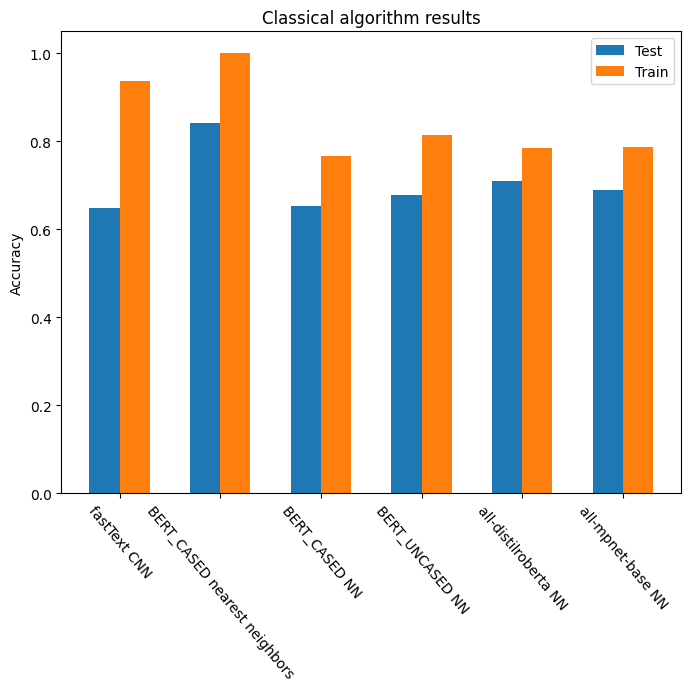

In [20]:
width = 0.3
plt.bar(np.arange(len(test_accs)) - (width/2), test_accs, width=width)
plt.bar(np.arange(len(train_accs)) + (width/2), train_accs, width=width)
plt.xticks(range(len(labels)), labels, rotation=-50)
plt.ylabel("Accuracy")
plt.title("Classical algorithm results")
plt.legend(["Test", "Train"])
plt.show()

All results are saved to file.

In [21]:
with open(f"{modeldir}/{dsName}_results.json", "w", encoding="utf-8") as f:
        json.dump({"train_accuracy": train_accs, "test_accuracy": test_accs, "model type": labels}, f, indent=1, ensure_ascii=False)

## 6. Saving, loading and re-using models

!!! To save the model use function save. The function's argument is the folder name where trained model's files will be saved.

In [22]:
classifier.save(f"{modeldir}/{dsName}_{embName}")

INFO:tensorflow:Assets written to: ../../models/classical/reviews_BERT_CASED\assets


!!! To load previousely saved model create *NNClassifier* object and use function *load*. The function's argument is the folder name where trained model's files are saved. In this example *newclassifier* object after loading will become replica of *classifier* object.

In [23]:
newclassifier = NNClassifier()
newclassifier.load(f"{modeldir}/{dsName}_{embName}")

Training/running model on CPU.


True

!!! To use classifier for prediction:
1) generate embedding vector;
2) predict the class of the sentence calling function *predict* and passing embedding vector of the sentence.

In [24]:
sys.path.append("../../data/data_processing/data_vectorisation/")
from Embeddings import Embeddings
vc = Embeddings('bert-base-cased','bert')
sentence="global financial system"
embvec = vc.getEmbeddingVector(sentence)

Using device:  cpu


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


bert-base-cased loaded!


In [25]:
classpredicted = newclassifier.predict(embvec)
origclasspredicted = classifier.predict(embvec)
print(f"Sentence: {sentence}\nClass (original classifier): {origclasspredicted}\nClass (reloaded classifier): {classpredicted}")

Sentence: global financial system
Class (original classifier): [1]
Class (reloaded classifier): [1]
